# Analiza

In [20]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

In [2]:
class LogData:
    def __init__(self, info: dict, data_frame: pd.DataFrame):
        self.info = info
        self.df = data_frame

        # fix totals for restarts inside data
        
    def col(self, col_name):
        return self.df[col_name]

In [3]:
def read_log(filename) -> LogData:
    info = {}
    header = []
    rows = []
    with open(filename) as f:
        # Parse info data which is terminated by an empty line
        for line in f:
            if not line.strip():
                break
            k, _, v = line.partition(':')
            info[k.strip()] = v.strip()
        # Read CSV data
        df = pd.read_csv(f)
        return LogData(info, df)        

In [43]:
f = read_log("logs/2022-05-22-00-20-09_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_neighbours")
#f.df.loc[f.df['session_games']==0]
f.df.head(10)

,iteration,loss,val_loss,total_games,total_victories,session_games,session_mean_clicks,session_mean_victories,session_mean_cells_revealed,session_time
0,0,0.568761,0.555617,228,0,228,4.385965,0.000000,45.978070,32.854790
1,1,0.348930,0.414551,297,0,69,14.289855,0.000000,76.724638,35.827014
2,2,0.373893,0.354452,370,0,73,13.520548,0.000000,71.835616,35.560157
3,3,0.312508,0.419587,423,0,53,17.924528,0.000000,75.094340,35.624781
4,4,0.319407,0.341171,466,0,43,23.046512,0.000000,102.906977,35.306668
5,5,0.295824,0.406953,516,0,50,19.880000,0.000000,86.360000,35.332172
6,6,0.326159,0.285256,551,1,35,27.142857,0.028571,111.228571,35.491908
7,7,0.289143,0.356841,590,1,39,24.820513,0.000000,99.153846,35.623927
8,8,0.307225,0.362574,633,1,43,23.162791,0.000000,91.348837,35.506430
9,9,0.273649,0.378196,672,2,39,24.256410,0.025641,85.461538,35.608043


In [59]:
def plot_files(filenames, series, label_key, percent=False):
    pp = []
    for filename in filenames:
        data = read_log(filename)
        arr = data.col(series)[:100]
        if percent:
            arr = arr * 100
        label = label_key.format(**data.info)
        if len(arr) > 50:
            window = np.clip((len(arr)//60)*2-1, 11, 51)
            arr = savgol_filter(arr, window, 0)
        pp.append((arr, label))
    for arr, label in sorted(pp, key=lambda al: al[1]):
        plt.plot(arr, label=label)
    plt.title(series)
    plt.xlabel("training session")
    if percent:
        plt.ylabel("%")
    plt.legend() #title=label_key)
    plt.show()

In [40]:
sorted(os.listdir("logs"))

['2022-05-21-00-09-10_beginner_conv2d_relu_sigmoid_binarycrosse_adam1_predictions',
 '2022-05-21-00-11-33_beginner_conv2d_relu_sigmoid_binarycrosse_adam1_neighbours',
 '2022-05-21-00-14-03_beginner_conv2d_relu_sigmoid_binarycrosse_adam1_board',
 '2022-05-21-11-00-23_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_predictions',
 '2022-05-21-11-00-38_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_neighbours',
 '2022-05-21-11-00-59_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_board',
 '2022-05-22-00-19-57_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_predictions',
 '2022-05-22-00-20-09_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_neighbours',
 '2022-05-22-00-20-33_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_board',
 '2022-05-22-15-34-58_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_predictions',
 '2022-05-22-15-35-02_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_neighbours',
 '2022-05-22-15-35-06_intermediate_conv2d_relu_sigmoid_binarycross

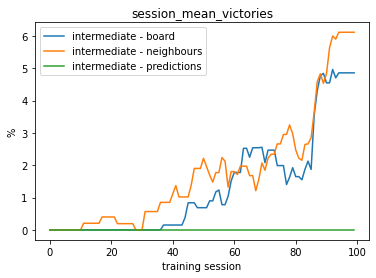

In [62]:
plot_files(
    filenames=[f"logs/{f}" for f in os.listdir("logs") if "2022-05-22-15" in f],
    series="session_mean_victories",
    label_key="{DIFFICULTY} - {TRUTH ALGORITHM}",
    percent=True)

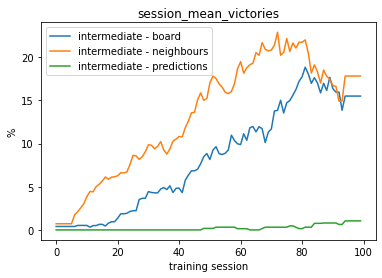

In [63]:
plot_files(
    filenames=[f"logs/{f}" for f in os.listdir("logs") if "2022-05-22-0" in f],
    series="session_mean_victories",
    label_key="{DIFFICULTY} - {TRUTH ALGORITHM}",
    percent=True)

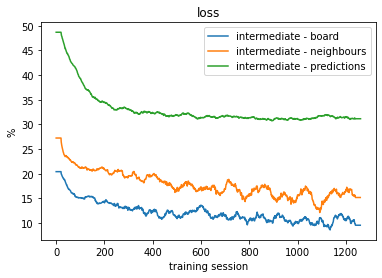

In [25]:
plot_files(
    filenames=[f"logs/{f}" for f in os.listdir("logs") if "2022-05-22" in f],
    series="loss",
    label_key="{DIFFICULTY} - {TRUTH ALGORITHM}",
    percent=True)

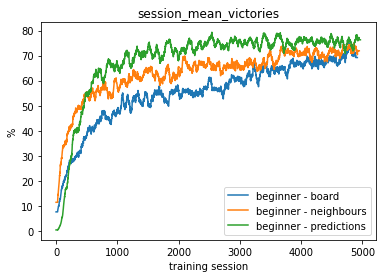

In [8]:
plot_files(
    filenames=[f"logs/{f}" for f in os.listdir("logs") if "begin" in f],
    series="session_mean_victories",
    label_key="{DIFFICULLTY} - {TRUTH ALGORITHM}",
    percent=True
)

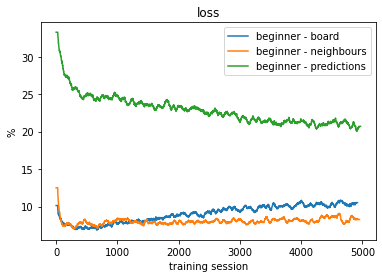

In [26]:
plot_files(
    filenames=[f"logs/{f}" for f in os.listdir("logs") if "begin" in f],
    series="loss",
    label_key="{DIFFICULLTY} - {TRUTH ALGORITHM}",
    percent=True
)